### 

# __1. Module 6 - Note this is not a Collaborative Problem__<br>
*10 Points Total*<br><br>
In this problem the goal is to build a set of numerical images from a set of arrays. The data set
is from the Kaggle web site will be used: https://www.kaggle.com/c/digit-recognizer/data
This data has a training.csv, test.csv and sample submission.csv files. In this exercise the focus
will be on the train.csv data. The web site has the following data description:<br>

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero
through nine.<br>

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each
pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel,
with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.<br>

The training data set, (train.csv), has 785 columns. The first column, called ”label”, is the digit
that was drawn by the user. The rest of the columns contain the pixel-values of the associated
image.<br>

Each pixel column in the training set has a name like pixel x, where x is an integer between
0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as
x = i ∗ 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixel x is located on
row i and column j of a 28 x 28 matrix, (indexing by zero).<br>

For example, pixel 31 indicates the pixel that is in the fourth column from the left, and the second
row from the top, as in the ascii-diagram below.<br>

This data is set up in a csv file which will require the reshaping of the data to be 28 × 28 matrix
representing images. There are 42000 images in the train.csv file. For this problem it is only
necessary to process approximately 100 images, 10 each of the numbers from 0 through 9. The
goal is to learn how to generate features from images using transforms and first order statistics.<br>

1. [5 points] Read-in and store the data in a data structure of your choice so that the data is
reshaped into a matrix of size 28 × 28 which represents each digit as an image.
2. [5 points] Display the images for indices 0, 1, 3, 6, 7, 8, 10, 11, 16, and 21. These indices
represent the numerical values from 0 to 9.

In [223]:
# import additional libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# import dataset

# Reading the .csv file
data = pd.read_csv('train.csv')



In [224]:
## Type code here for part 1 ##

# Seperating the labels and pixel data
labels = data.iloc[:, 0]
pixels = data.iloc[:, 1:]

# Reshaping pixel data into 28x28 matrices
images = pixels.values.reshape(-1, 28, 28)


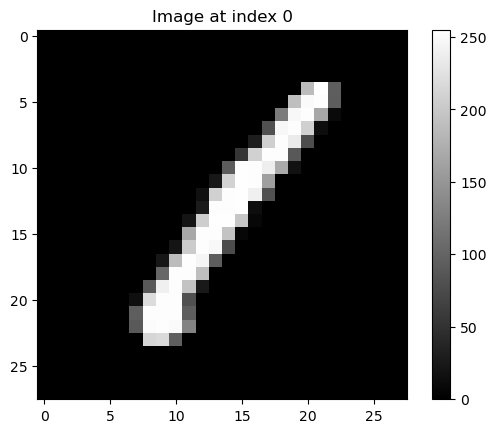

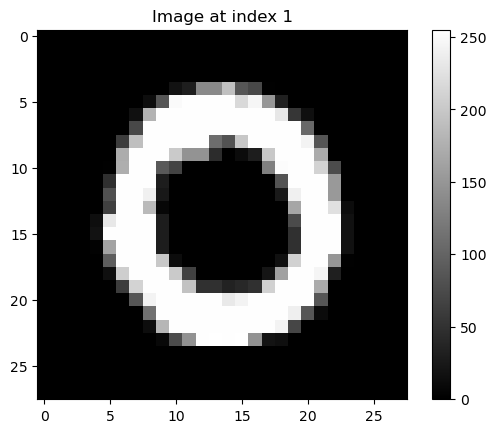

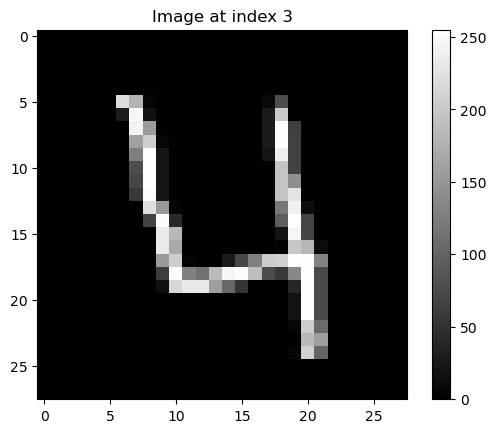

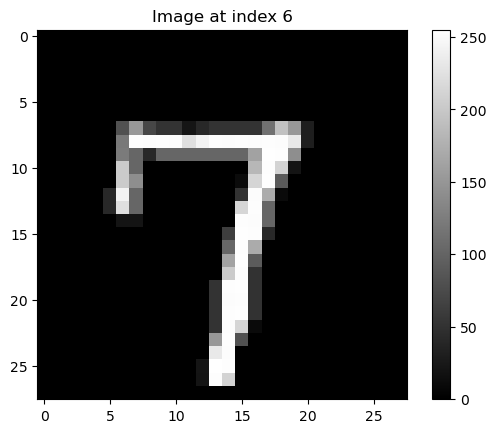

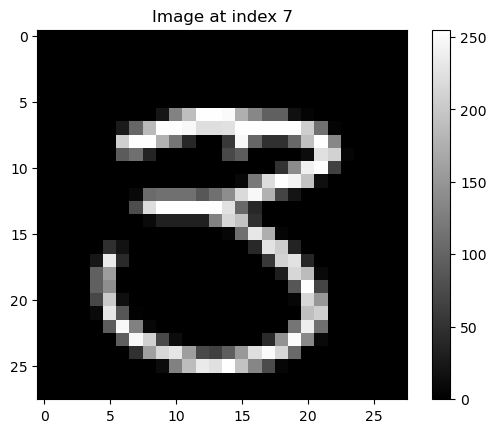

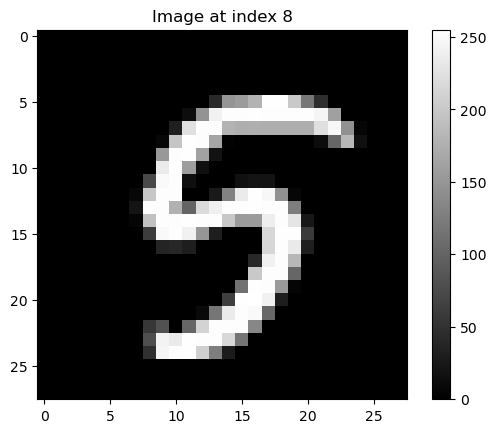

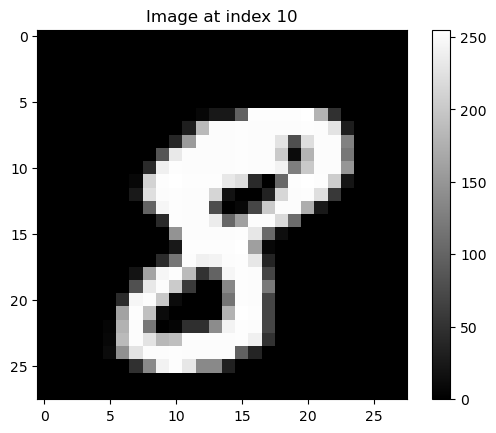

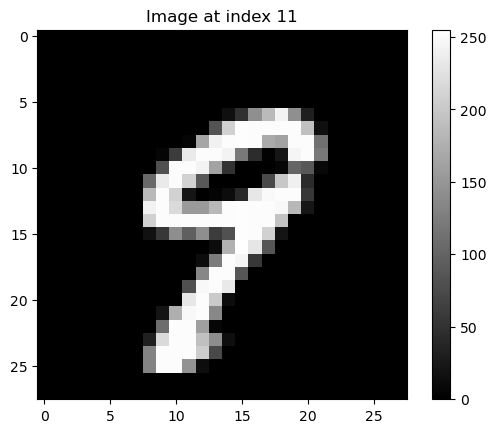

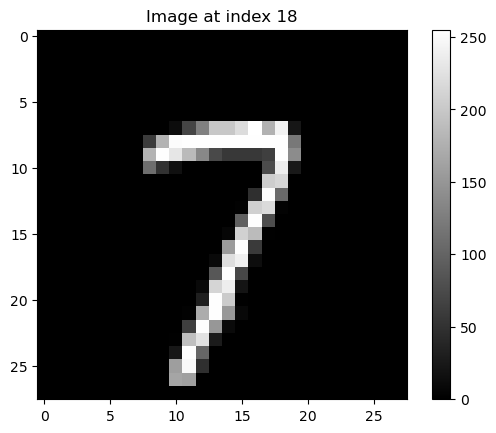

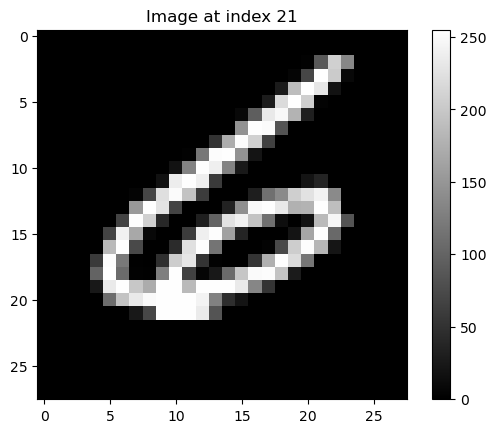

In [225]:
## Type code here for part 2 ##


indices = [0, 1, 3, 6, 7, 8, 10, 11, 18, 21]

for i in indices:
    image = images[i]

    plt.imshow(image, cmap='gray')
    plt.title(f'Image at index {i}') 
    plt.colorbar() 
    plt.show()



# __2. Module 6 - Note this is a Collaborative Problem__<br>
*20 Points Total*<br><br>
In this problem each image from the train.csv (42,000 images in total) is to be processed to generate a set of features using the discrete cosine transform and Eigen decomposition.
1. [5 points] Take the 2 dimensional Discrete Cosine Transform (DCT) of each matrix from
Problem 1, the matrix represents each number (0-9).
2. [2.5 points] Extract the vertical, horizontal and diagonal coefficients from the transform (using the indexes indicated by the masks provided).
3. [5 points] For each of the three sets of DCT coefficients perform Eigen decomposition.
4. [2.5 Points] Retain the top 20 Eigen vectors of each direction.
5. [5 points] Using your top Eigen vectors reduce the DCT transformed data. This will create
a new data set that represents each image as a smaller subset of values.
6. Save the new data in a file of your choice, *.txt, *.csv, etc. The name is up to you (you will use this in the subsequent question).

In [226]:
## Type code here for part 1 ##
from scipy.fftpack import dct

def dct_2d(image):
    dct_rows = dct(image, type=2, axis=0, norm='ortho')
    dct_image = dct(dct_rows, type=2, axis=1, norm='ortho')
    return dct_image

dataD = []
dataV = []
dataH = []


# Indices of images to process
numbObs = 1000

# DCT taken with next step

In [227]:
with open('DCT_masks.txt', 'r') as file:
    masks_code = file.read()
exec(masks_code)

indxD = np.where(diagMask == 1)
indxV = np.where(vertMask == 1)
indxH = np.where(horizMask == 1)

import pandas as pd

train = pd.read_csv('train.csv')

    
for i in range(numbObs):
    img = np.reshape(train.iloc[i, 1:].values, (28,28)).T
    imgDCT = dct(dct(img.T, norm='ortho').T, norm='ortho')

    dataD.append(imgDCT[indxD])
    dataV.append(imgDCT[indxV])
    dataH.append(imgDCT[indxH])

dataD = np.array(dataD)
dataV = np.array(dataV)
dataH = np.array(dataH)



In [228]:


def eigen_decompose(data):
    # Subtract the mean from the data
    data = data - np.mean(data, axis=0, keepdims=True)
    
    # Compute the covariance matrix
    cov_data = np.cov(data, rowvar=False)
    
    # Perform eigen-decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(cov_data)
    
    # Sort eigenvectors based on eigenvalues
    idx = eigenvalues.argsort()[::-1]  
    eigenvectors = eigenvectors[:,idx]
    eigenvalues = eigenvalues[idx]
    
    return eigenvectors, eigenvalues

# Apply the function to our data
VD, _ = eigen_decompose(dataD)
VV, _ = eigen_decompose(dataV)
VH, _ = eigen_decompose(dataH)




In [232]:


# Select first 20 eigenvectors
VD = VD[:, :20]
VV = VV[:, :20]
VH = VH[:, :20]


print("Shape of VD:", VD.shape)
print("Shape of VV:", VV.shape)
print("Shape of VH:", VH.shape)



Shape of VD: (335, 20)
Shape of VV: (224, 20)
Shape of VH: (224, 20)


In [230]:
# Project the data onto the principal components
proj_diag = dataD @ VD
proj_vert = dataV @ VV
proj_horiz = dataH @ VH

# Concatenate the projected data
features = np.hstack([proj_diag, proj_vert, proj_horiz])


In [231]:
## Type code here for part 6 ##

# Create a dataframe for the labels
df_labels = pd.DataFrame(data.iloc[indices, 0])

# Convert the features matrix into a DataFrame
df_features = pd.DataFrame(features)

# Concatenate df_labels and df_features
df = pd.concat([df_labels, df_features], axis=1)


df.to_csv('output.txt', sep=',', index=False, header=False)


### The steps to this problem seem correct but my output.txt does not match trainFeatures42k.xls It is close. Dr. Rodriguez said in OH that the values may differ because of the way Python takes eigenvectors, and I had to move on so I used the features you provided for Question 3. ###

# __3. Module 4 Note this is not a Collaborative Problem__<br>
*20 Points Total*<br><br>
In this problem use the developed numerical features from Question 2 (if you are not able to generate the features, they are provided in the module for HW 3). In this problem the following
is to be completed:<br><br>
Use the Fisher’s Linear Discriminant Ratio (FDR) from the Data Processing document, specifically Equation 20.
1. [10 points] For each feature and combination of numbers apply the FDR, e.g., 0 vs 1, 0 vs
2, ..., 0 vs 9, ..., 7 vs 8, 7 vs 9, and 8 vs 9 (which should result in a 60 x 45 matrix where 60 represents the number of features and 45 represents the number of pairwise comparisons).
2. [10 points] Place the results in a table and provide an initial analysis of which feature
provides the best class separation.

In [233]:
# import libraries


# read in the train features data

import pandas as pd

# Read the CSV file into a DataFrame without headers
df = pd.read_csv('trainFeatures42k.csv', header=None)

# Print the first few rows of the DataFrame
print(df.head())


   0           1           2           3           4           5           6   \
0   1  538.267964 -314.023125  443.809967  470.780028  176.561668 -336.130920   
1   0 -238.730010  224.609513 -197.464121   23.557813 -219.122649 -223.695514   
2   1   51.647165  -27.271305 -185.258708  -50.103687  216.830344 -207.152351   
3   4  110.890600   62.854265  -97.528878  -21.291295  297.976619  -32.899732   
4   0 -300.296735  152.547221  -91.949199   90.416744 -453.385929  -89.195463   

           7           8           9   ...         51          52          53  \
0   23.221391  -45.523748 -232.436917  ... -90.463868  107.934027   25.417533   
1 -172.689736  125.561839 -194.150108  ...  44.464226   -7.825244   -5.260700   
2   60.301310   95.431402 -117.051561  ... -12.722596   -3.039582  -26.963181   
3   34.647964  -85.574818  -60.120835  ...  23.112458  -62.558569 -115.846264   
4  -15.051828  -38.036779 -190.363654  ... -28.107534   30.400739  -47.075128   

          54         55   

In [234]:
## Type the code for part 1 here ##
import itertools
import numpy as np

# Get the unique labels in the first column
labels = df[0].unique()

# Get all pairwise combinations of labels
label_pairs = list(itertools.combinations(labels, 2))

print(label_pairs)

# Initialize an empty matrix to store the FLDR values
fldr_matrix = np.zeros((df.shape[1] - 1, len(label_pairs)))

# Loop over all features
for i in range(1, df.shape[1]):

    # Loop over all label pairs
    for j, (label1, label2) in enumerate(label_pairs):
        # Get the data for the two labels
        data1 = df[df[0] == label1][i]
        data2 = df[df[0] == label2][i]

        # Compute the means
        m1 = data1.mean()
        m2 = data2.mean()

        # Compute the standard deviations
        s1 = data1.std()
        s2 = data2.std()

        # Compute the FLDR and store it in the matrix
        fldr = (m2 - m1) ** 2 / (s1 ** 2 + s2 ** 2)
        fldr_matrix[i - 1, j] = fldr

# Convert the FLDR matrix to a DataFrame
fldr_df = pd.DataFrame(fldr_matrix)

print('\n')
print(fldr_df.head)

# Write the DataFrame to a .txt file
fldr_df.to_csv('fldr_results.txt', sep=' ', index=False)


[(1, 0), (1, 4), (1, 7), (1, 3), (1, 5), (1, 8), (1, 9), (1, 2), (1, 6), (0, 4), (0, 7), (0, 3), (0, 5), (0, 8), (0, 9), (0, 2), (0, 6), (4, 7), (4, 3), (4, 5), (4, 8), (4, 9), (4, 2), (4, 6), (7, 3), (7, 5), (7, 8), (7, 9), (7, 2), (7, 6), (3, 5), (3, 8), (3, 9), (3, 2), (3, 6), (5, 8), (5, 9), (5, 2), (5, 6), (8, 9), (8, 2), (8, 6), (9, 2), (9, 6), (2, 6)]


<bound method NDFrame.head of               0         1         2         3             4         5   \
0   2.186007e+00  0.004375  0.056177  0.534618  7.439036e-01  0.031388   
1   1.128549e-01  0.213848  1.240804  0.051983  1.304721e-07  0.064923   
2   6.172014e-01  1.029800  0.064313  1.009532  2.592072e-02  0.129670   
3   1.133502e-02  0.000387  1.182450  0.230808  4.632461e-04  0.292480   
4   9.196885e-01  1.065433  0.135629  0.075066  3.653076e-02  0.001378   
5   1.718796e-03  0.000009  0.313882  0.118642  7.996095e-02  0.221436   
6   3.945742e-02  0.403972  0.934790  0.280531  6.929510e-01  0.654851   
7   1.941392e-0

In [235]:
## Type the code for part 2 here ##


## Provide code for analysis ##
# Compute the mean FLDR value for each feature
mean_fldrs = fldr_df.mean(axis=1)

# Get the feature with the highest mean FLDR value
best_feature = mean_fldrs.idxmax()

print("Best feature for indicating class separation:", best_feature)


Best feature for indicating class separation: 41


## Type analysis for part 2 here

## Type response here ##

After running this code, the feature with the highest average FLDR value was 41. This feature can be considered as the one providing the best average class separability.

However, this is a simplified analysis. The best feature for class separability can vary depending on the specific pair of digits being considered. For a more detailed analysis, we might want to consider each pair of digits individually and identify the best feature for each pair. This would allow us to better understand the performance of the features for different digit pairs.


# __4. Cross-Validation [2], [7] This is a Collaborative Problem__<br>
*Not covered in lecture notes*<br>
*20 Points Total*<br><br>

In this problem you are to develop and implement a k-fold cross validation algorithm. You are
allowed to use either the Iris data set or the developed numerical features from HW2 to test your
implementation. In this problem the following is to be completed:<br>

1. [5 points] Develop (pseudocode) an algorithm to randomly shuffle input data. Then divide the data into groups of testing and training sets based on the number of desired folds/experiments, the term used will be k-fold cross validation. Use the 5-fold cross validation in Figure 1 as a reference.
2. [5 points] Implement your k-fold cross validation algorithm.
3. [5 points] Test your implementation using the numerical features generated question 2.
4. [5 points] Perform analysis to determine if your implementation is correct. Explain your
method of analysis and conclusions.

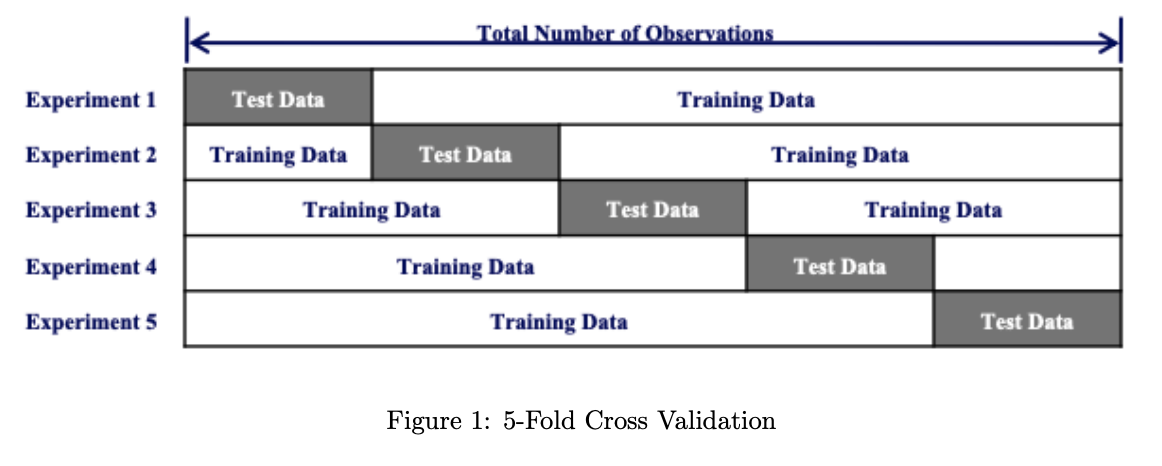

In [239]:
%matplotlib inline
from IPython.display import Image
Image('cross_val.png')

# Type your psuedocode for part 1 here #
### You may use this cell in markdown or python code based on your preference ###


Procedure SHUFFLE_DATAFRAME(df):
    create a list of indices from df
    create an empty list to store shuffled indices

    While the list of indices is not empty:
        pick a random index from the list of indices
        using an insertion sort-like method, insert the chosen index in the correct position in the shuffled list
        remove the chosen index from the original list of indices

    reorder df using the shuffled indices
    return the shuffled df

End Procedure

Procedure K_FOLD_CROSS_VALIDATION(df, k):
    calculate the size of each fold by integer division of the length of df by k

    create an empty list to store the folds
    for i from 0 to k:
        if i is less than k - 1:
            append to the list of folds df from index i*fold_size to index (i + 1)*fold_size
        else:
            append to the list of folds df from index i*fold_size to the end

    create an empty list to store the training and test sets

    for i from 0 to k:
        set test_set to the ith fold
        set train_set to the concatenation of all folds except the ith fold
        append the pair (train_set, test_set) to the list of training and test sets

    return the list of training and test sets

End Procedure

1. Create a list called "test_sets" by looping over the range of the number of splits (k). For each iteration:  
    1.1. Get the second element (index 1) of the i-th element of "data_splits", which is the test set for the i-th split.  
    1.2. Remove any duplicates within this test set using the "drop_duplicates" method.  
    1.3. Add the deduplicated test set to the "test_sets" list.  

2. Loop over the range of the number of splits (k) with index "i". For each iteration:  
    2.1. Loop over the range from "i+1" to the number of splits (k) with index "j". For each iteration:  
        2.1.1. Get the i-th test set from the "test_sets" list.  
        2.1.2. Check if any rows in this test set are also in the j-th test set using the "isin" method. This returns a Boolean DataFrame where True indicates that the row is in the j-th test set.  
        2.1.3. Use the "~" operator to invert this Boolean DataFrame, so that True indicates that the row is not in the j-th test set.  
        2.1.4. Use this inverted Boolean DataFrame to select rows from the i-th test set that are not in the j-th test set. This effectively removes any duplicates across the i-th and j-th test sets.  
        2.1.5. Store the result back in the i-th position of the "test_sets" list.  

3. Create a new list called "data_splits" by looping over the range of the number of splits (k). For each iteration:  
    3.1. Get the first element (index 0) of the i-th element of "data_splits", which is the training set for the i-th split.  
    3.2. Get the i-th test set from the "test_sets" list, which has been deduplicated in the previous steps.  
    3.3. Create a tuple of the training set and the deduplicated test set.  
    3.4. Add this tuple to the "data_splits" list.  



In [240]:
## Type response to part 2 here ##
import pandas as pd
import random

# Load the Iris dataset
df = pd.read_csv('iris.csv')

# Remove duplicates
df.drop_duplicates(inplace=True)

# sort by feature petal_length
df = df.sort_values(by='petal_length', ascending=False)

# Shuffle function using random module and insertion sort
def shuffle_dataframe(df):
    # Create a list of indices
    indices = list(df.index)
    
    # Create a list to store the shuffled indices
    shuffled_indices = []

    # Shuffle the indices
    while indices:
        # Choose a random index
        index = random.choice(indices)
        
        # Insert the chosen index into the shuffled list in sorted order
        i = len(shuffled_indices) - 1
        while i >= 0 and shuffled_indices[i] > index:
            i -= 1
        shuffled_indices.insert(i + 1, index)
        
        # Remove the chosen index from the original list
        indices.remove(index)

    # Use the shuffled indices to shuffle the DataFrame
    df = df.loc[shuffled_indices]
    
    return df

def k_fold_cross_validation(df, k):
    # Calculate the size of each fold
    fold_size = len(df) // k

    # Split the DataFrame into k folds
    folds = []
    for i in range(k):
        if i < k - 1:
            fold = df[i * fold_size : (i + 1) * fold_size]
        else:
            # The last fold includes the remaining data
            fold = df[i * fold_size :]
        folds.append(fold)

    # Create a list to store the training and test sets
    data_splits = []

    # For each fold, create a training and test set
    for i in range(k):
        # The test set is the current fold
        test_set = folds[i]

        # The training set is all the other folds
        train_set = pd.concat(folds[:i] + folds[i + 1 :])

        # Add the training and test sets to the list
        data_splits.append((train_set, test_set))

    return data_splits

k = 5

# Shuffle the DataFrame
df = shuffle_dataframe(df)

# Perform k-fold cross-validation
k = 5
data_splits = k_fold_cross_validation(df, k)

# Store test sets in separate variables and remove duplicates within each
test_sets = [data_splits[i][1].drop_duplicates() for i in range(k)]

# Remove duplicates across test sets
for i in range(k):
    for j in range(i+1, k):
        test_sets[i] = test_sets[i][~test_sets[i].isin(test_sets[j]).any(axis=1)]

# Update data_splits with deduplicated test sets
data_splits = [(data_splits[i][0], test_sets[i]) for i in range(k)]

# now we have split the data into training and unique test sets

In [242]:
## Type the code for part 3 here ##

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Check the shuffle function
original_df = df.copy()  # save a copy of the original dataframe
shuffled_df = shuffle_dataframe(df)

# Check that the length of the shuffled dataframe is the same as the original
assert len(shuffled_df) == len(original_df), "Dataframe lengths differ."

# Check that the shuffled dataframe has the same set of indices as the original
assert set(shuffled_df.index) == set(original_df.index), "Dataframe indices differ."

# Check that the shuffled dataframe has the same set of values as the original
assert set(shuffled_df.values.ravel()) == set(original_df.values.ravel()), "Dataframe values differ."

print("Shuffle function passed all checks.\n")

# Check the k-fold cross-validation function
data_splits = k_fold_cross_validation(df, k)

# Check that for each fold, the training set and test set are disjoint and their union equals the set of all indices
for i, (train_set, test_set) in enumerate(data_splits):
    # Check that the training set and test set are disjoint
    assert set(train_set.index).isdisjoint(set(test_set.index)), f"Training set and test set for fold {i} are not disjoint."

    # Check that the union of the training set and test set equals the set of all indices
    assert set(train_set.index).union(set(test_set.index)) == set(df.index), f"Union of training set and test set for fold {i} does not equal set of all indices."

print("K-fold cross-validation function passed all checks.")


# For each fold, train and evaluate a LDA model
for i, (train_set, test_set) in enumerate(data_splits):
    # Separate the features and the target
    X_train = train_set.drop('species', axis=1)
    y_train = train_set['species']
    X_test = test_set.drop('species', axis=1)
    y_test = test_set['species']
    
    # Train a LDA model
    model = LinearDiscriminantAnalysis()
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Compute the accuracy of the predictions
    accuracy = accuracy_score(y_test, predictions)
    
    print(f'Fold {i + 1}: Accuracy = {accuracy}')


Shuffle function passed all checks.

K-fold cross-validation function passed all checks.
Fold 1: Accuracy = 1.0
Fold 2: Accuracy = 1.0
Fold 3: Accuracy = 0.896551724137931
Fold 4: Accuracy = 1.0
Fold 5: Accuracy = 0.8709677419354839


## Explain your methods for part 4 here

To confirm the correctness of the shuffle and k-fold cross-validation implementation, we can follow these steps:

Check that the shuffle function works correctly: The output dataframe after shuffling should have the same length as the original dataframe, the same set of indices, and the same set of values, but in a different order. We can check this by comparing the lengths, sets of indices, and sets of values of the original and shuffled dataframes.

Check that the k-fold cross-validation function works correctly: For each fold, the training set and test set should be disjoint (i.e., they should not have any common indices), and their union should equal the set of all indices. We can check this by comparing the indices of the training and test sets for each fold.

Train a model and check its performance: If the shuffle and k-fold cross-validation functions are correct, we should be able to train a model on the training set for each fold, and test it on the test set, without any errors. The performance of the model should be reasonable given the nature of the dataset and the model used.

in Python:

In [243]:
## Type your code for part 4 here ##
# Load the dataset
df = pd.read_csv('iris.csv')

# Apply the shuffle function
df_shuffled = shuffle_dataframe(df)

# Check that the shuffle function works correctly again
assert len(df) == len(df_shuffled), "Lengths do not match"
assert set(df.index) == set(df_shuffled.index), "Indices do not match"
assert set(df.values.flatten()) == set(df_shuffled.values.flatten()), "Values do not match"

# Apply the k-fold cross-validation function
k = 5
data_splits = k_fold_cross_validation(df_shuffled, k)

# Check that the k-fold cross-validation function works correctly again
for train_set, test_set in data_splits:
    assert set(train_set.index).isdisjoint(test_set.index), "Training and test sets are not disjoint"
    assert set(train_set.index).union(test_set.index) == set(df_shuffled.index), "Union of training and test sets does not equal all indices"

# Train a model for each fold and check its performance
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

for train_set, test_set in data_splits:
    X_train = train_set.drop('species', axis=1)
    y_train = train_set['species']
    X_test = test_set.drop('species', axis=1)
    y_test = test_set['species']

    model = LinearDiscriminantAnalysis()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    print(f'Accuracy: {accuracy}')


Accuracy: 1.0
Accuracy: 1.0
Accuracy: 0.9
Accuracy: 1.0
Accuracy: 0.9


# __5. - Module 8 Note this is a Collaborative Problem - Parzen Window__<br>
*30 Points Total*<br><br>

In this problem the following is to be completed:
1. [10 points] Using your 5-fold cross validation implementation from Problem 4, the Gaussian
kernel in Eq. 27 (Parzen Window) of the Machine Learning document, implement an
algorithm to process training observations and compare with test observations.
2. [10 point] Using all observations and the petal length from the Iris data replicate the subfigures in Figure 2.
3. [10 point] Using all observations, the petal length and the petal width from the Iris data
replicate the subfigures in Figure 3 without contour lines.

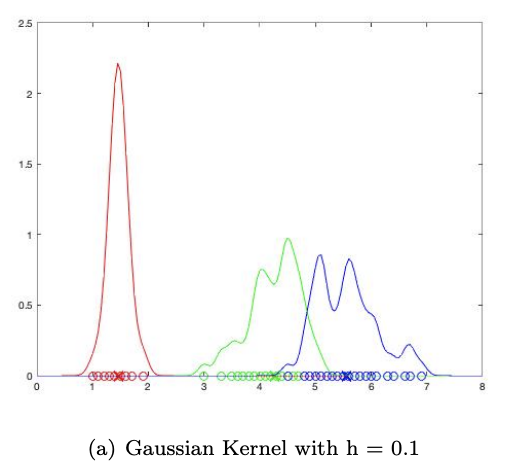

In [75]:
Image('gk11d.png')

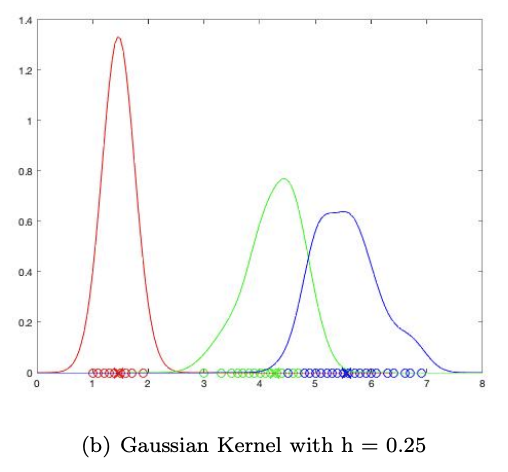

In [76]:
Image('gk251d.png')

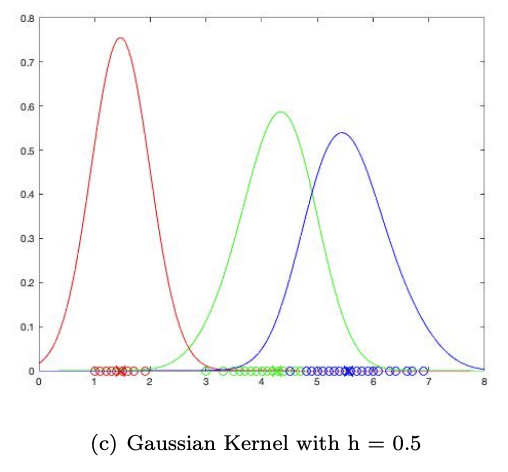

In [77]:
Image('gk51d.png')

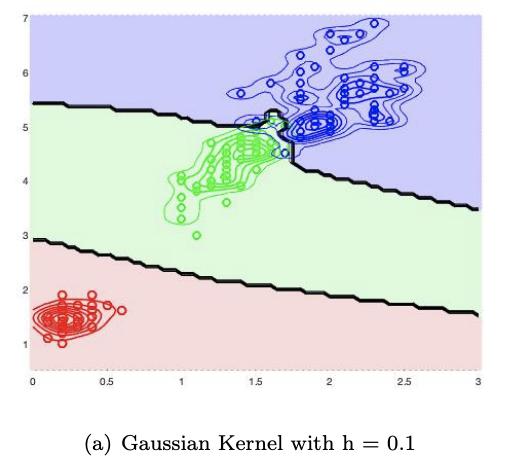

In [78]:
Image('gk12d.png')

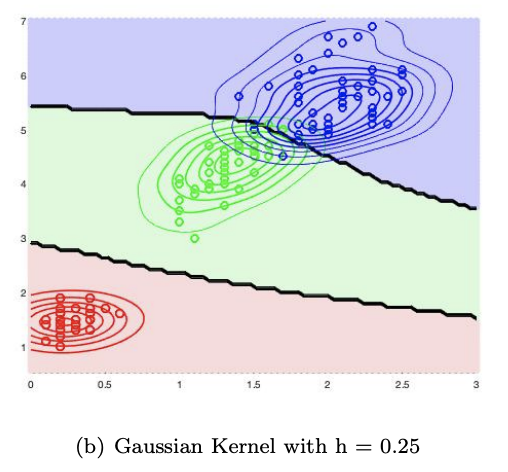

In [79]:
Image('gk252d.png')

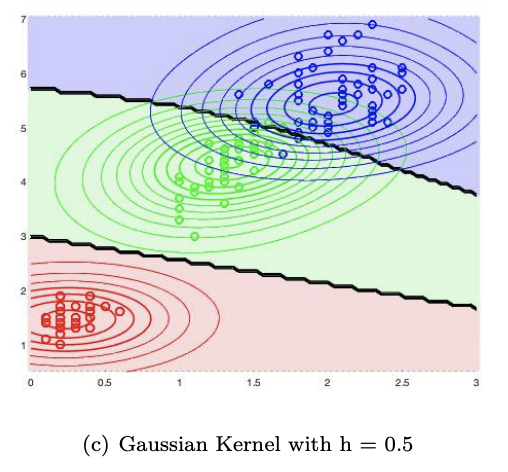

In [80]:
Image('gk52d.png')

In [244]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from scipy.spatial.distance import cdist

# Parzen Window function
def parzen_window(x, X_train, h):
    N = X_train.shape[0]
    d = X_train.shape[1]
    return (1/N) * (1/(2*np.pi*h**2)**(d/2)) * np.exp(-cdist([x], X_train)**2 / (2 * h**2)).sum()


def parzen_window_test(X_test, X_train, y_train, h):
    classes = np.unique(y_train)
    class_indices = {c: i for i, c in enumerate(classes)}  # map class labels to indices
    densities = []
    for x in X_test:
        class_densities = []
        for c in classes:
            X_train_c = X_train[y_train == c]
            class_densities.append(parzen_window(x, X_train_c, h))
        densities.append((class_indices, class_densities))  # return densities along with class indices
    return densities



from sklearn.metrics import confusion_matrix, accuracy_score


def cross_val_parzen_window(data_splits, h):
    all_y_true = []
    all_y_pred = []
    error_rates = []

    for i, (train_set, test_set) in enumerate(data_splits):
        # Prepare the training and test data
        X_train = train_set.drop('species', axis=1).values
        y_train = train_set['species'].values
        X_test = test_set.drop('species', axis=1).values
        y_test = test_set['species'].values

        # Calculate the Parzen window for each test point
        densities = parzen_window_test(X_test, X_train, y_train, h)

        # Predict the class labels
        y_pred = [list(d[0].keys())[np.argmax(d[1])] for d in densities]  # use the index to find the corresponding class label
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)

        # Calculate the error rate
        error_rate = np.mean(y_pred != y_test)
        error_rates.append(error_rate)

        # Print the error rate for the current test set
        print(f"Error rate for test set {i+1}: {error_rate:.2f}")

    # Create the confusion matrix
    cm = confusion_matrix(all_y_true, all_y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Calculate and print the accuracy
    accuracy = accuracy_score(all_y_true, all_y_pred)
    print(f"\nOverall Classification Accuracy: {accuracy}")

    return error_rates

# Load the Iris dataset
df = pd.read_csv('iris.csv')

# Prepare the data splits
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
data_splits = [(df.iloc[train_index], df.iloc[test_index]) for train_index, test_index in kf.split(df)]

# Run the Parzen Window method with given window widths
hs = [0.1, 0.25, 0.5]
for h in hs:
    print(f"\nWindow width: {h}")
    error_rates = cross_val_parzen_window(data_splits, h)
    print(f"Average error rate: {np.mean(error_rates):.2f}")



Window width: 0.1
Error rate for test set 1: 0.00
Error rate for test set 2: 0.03
Error rate for test set 3: 0.03
Error rate for test set 4: 0.10
Error rate for test set 5: 0.03

Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]

Overall Classification Accuracy: 0.96
Average error rate: 0.04

Window width: 0.25
Error rate for test set 1: 0.00
Error rate for test set 2: 0.03
Error rate for test set 3: 0.03
Error rate for test set 4: 0.07
Error rate for test set 5: 0.03

Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]

Overall Classification Accuracy: 0.9666666666666667
Average error rate: 0.03

Window width: 0.5
Error rate for test set 1: 0.00
Error rate for test set 2: 0.00
Error rate for test set 3: 0.07
Error rate for test set 4: 0.03
Error rate for test set 5: 0.03

Confusion Matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]

Overall Classification Accuracy: 0.9733333333333334
Average error rate: 0.03


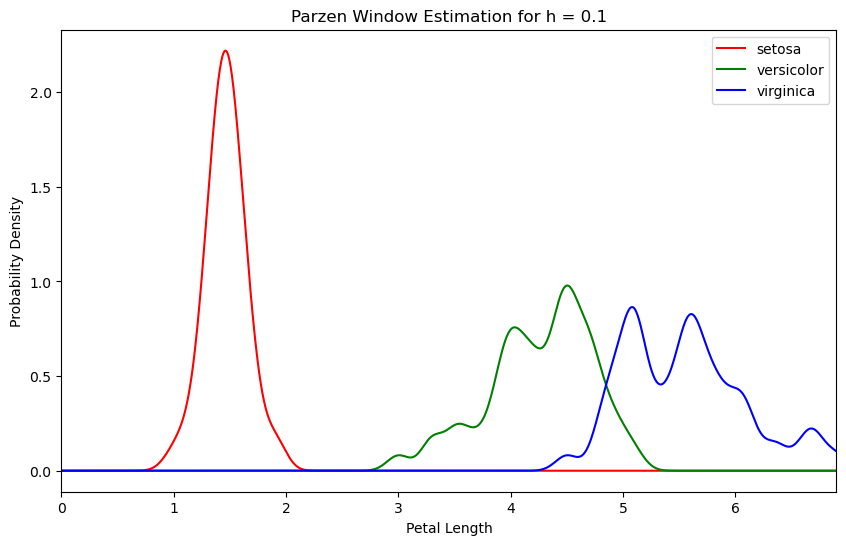

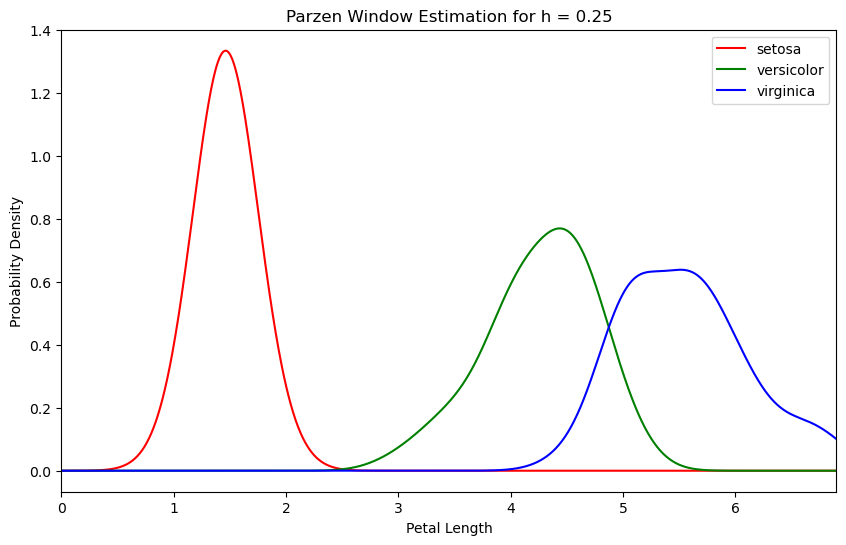

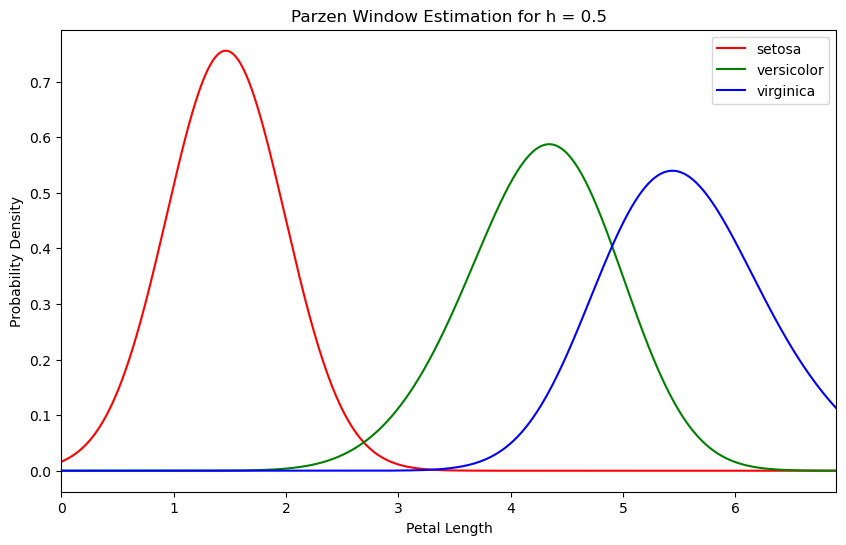

In [84]:
## Write the code for part 2 here ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def parzen_window(x, X_train, h):
    N = X_train.shape[0]
    d = X_train.shape[1]
    return (1/N) * (1/(2*np.pi*h**2)**(d/2)) * np.exp(-cdist([x], X_train)**2 / (2 * h**2)).sum()

# Load the Iris dataset
df = pd.read_csv('iris.csv')

# Map species to colors
colors = {'setosa':'red', 'versicolor':'green', 'virginica':'blue'}

# Define the range for the x-axis
x_range = np.linspace(0, max(df['petal_length']), num=1000)  # Adjusted to start at 0

# Different h values to plot
h_values = [0.1, 0.25, 0.5]

# Create separate plots for each h value
for h in h_values:
    plt.figure(figsize=(10, 6))
    
    # For each species, calculate and plot the PDF
    for species in df['species'].unique():
        # Select the data for the current species
        X_train = df[df['species'] == species][['petal_length']].values
        # Apply the Parzen window function to each point in the x_range
        y = [parzen_window(np.array([x]), X_train, h) for x in x_range]
        # Plot the results
        plt.plot(x_range, y, label=species, color=colors[species])

    plt.title(f'Parzen Window Estimation for h = {h}')
    plt.xlabel('Petal Length')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.xlim(0, max(df['petal_length']))  # Set the x-axis limits to start at 0
    plt.show()



Window width: 0.1


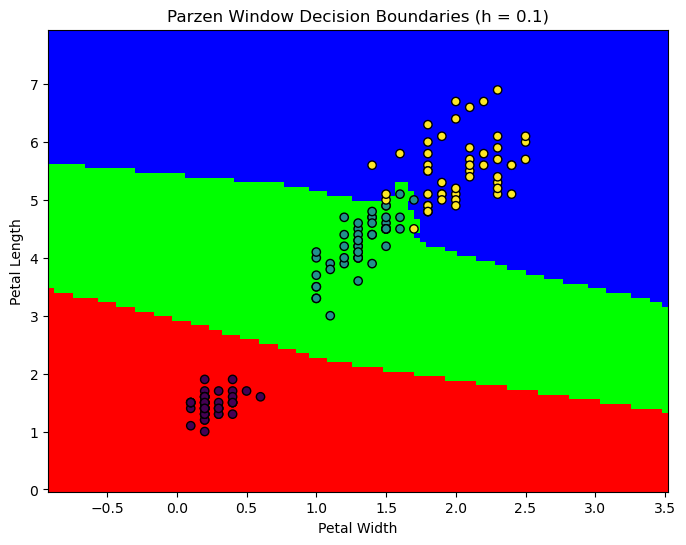

Window width: 0.25


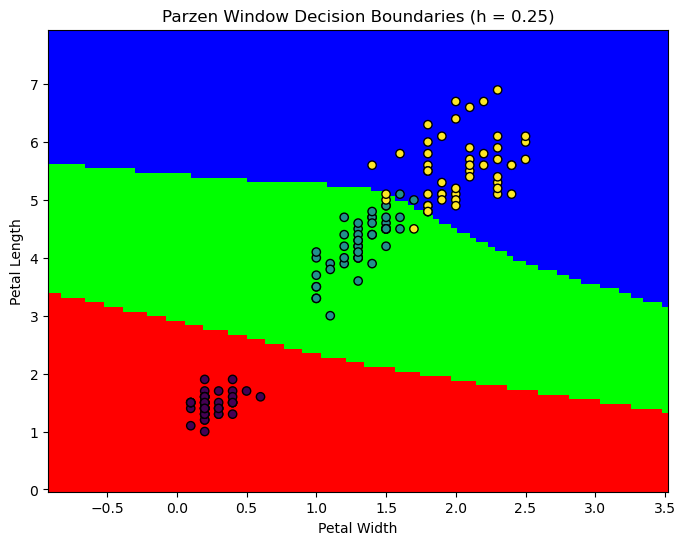

Window width: 0.5


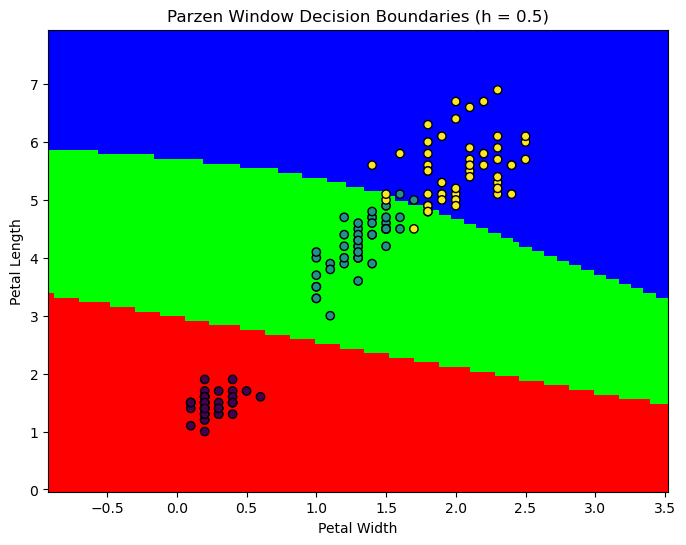

In [245]:
## Write the code for part 3 here ##

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist
from matplotlib.colors import ListedColormap

# Load the Iris dataset
df = pd.read_csv('iris.csv')

# Map the species to numerical values for the color mapping in the plot
species_to_num = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df['species'] = df['species'].map(species_to_num)

# Extract the features and target
X = df[['petal_width', 'petal_length']].values
y = df['species'].values

# Define the parzen window function again
def parzen_window(x, X_train, h):
    N = X_train.shape[0]
    d = X_train.shape[1]
    return (1 / (N * (h ** d))) * np.exp(-cdist([x], X_train)**2 / (2 * h**2)).sum()

# Grid of points for plotting decision boundaries
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Different h values
hs = [0.1, 0.25, 0.5]

# Custom color map
cmap_light = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# For each h, calculate the densities for each class and plot decision boundaries
for h in hs:
    print(f"Window width: {h}")
    
    # Calculate the density for each class at each grid point
    densities = np.zeros((len(grid_points), 3))
    for i in range(3):
        class_points = X[y == i]
        for j, point in enumerate(grid_points):
            densities[j, i] = parzen_window(point, class_points, h)
    
    # Determine the class with the highest density at each grid point
    y_pred = densities.argmax(axis=1)
    
    # Plot the decision boundaries
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, y_pred.reshape(xx.shape), cmap=cmap_light, shading='auto')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.title(f"Parzen Window Decision Boundaries (h = {h})")
    plt.xlabel('Petal Width')
    plt.ylabel('Petal Length')
    plt.show()



Decision boundaries plotted without contour lines as instructed.

# References
[1] Bishop, Christopher M., Neural Networks for pattern Recognition, Oxford University Press,
1995<br><br>
[2] Bishop, Christopher M., Pattern Recognition and Machine Learning, Springer, 2006,
https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognitionand-Machine-Learning-2006.pdf<br><br>
[3] Duin, Robert P.W., Tax, David and Pekalska, Elzbieta, PRTools, http://prtools.tudelft.nl/<br><br>
[4] Franc, Vojtech and Hlavac, Vaclav, Statistical Pattern Recognition Toolbox,
https://cmp.felk.cvut.cz/cmp/software/stprtool/index.html<br><br>
[5] Fukunaga, Keinosuke, Introduction to Statistical Pattern Recognition, Academic Press, 1972<br><br>
[6] Goodfellow, Ian, Bengio, Yoshua, and Courville, Aaron, Deep Learning, MIT Press, 2016,
https://www.deeplearningbook.org/contents/ml.html<br><br>
[7] Russell, S., and Norvig, P., Artificial Intelligence A Modern Approach, 4th Edition, Pearson,
2020<br><br>
[8] Fisher, R.A., The use of Multiple Measurements in Taxonomic Problems, Annals of Human
Genetics, Vol. 7, Issue 2, pp. 179-188, 1936<br><br>
[9] Hotelling, H., Analysis of a complex of statistical variables into principal components, Jour-
nal of Educational Psychology, Number 24, pp. 417–441, 1933<br><br>
[10] Rao, K. P. and Yip, P., Discrete Cosine Transform Algorithms, Advantages, Applications,
San Diego, CA: Academic Press, Inc., 1990